# InstaBot - Part 2

In [50]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
from collections import OrderedDict 
import time
from datetime import datetime
from datetime import date
from selenium.common.exceptions import NoSuchElementException

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

driver = webdriver.Edge()
driver.maximize_window()
wait = WebDriverWait(driver, 10)

driver.get('https://www.instagram.com/')
time.sleep(3)

username = 'SAMPLE USERNAME'
password = 'SAMPLE PASSWORD'

In [26]:
my_username = driver.find_element(By.NAME,"username") #find the input boxes for username and password
my_password = driver.find_element(By.NAME,"password")
my_username.send_keys(username)                       #sending the my username and password to the browser
my_password.send_keys(password)
my_password.submit()                                  #clicking the submit button

time.sleep(5)                                         #waiting for 2 seconds till the next is loading
driver.find_element(By.CLASS_NAME,'x1i10hfl').click() #clicking not now on the pop up that came
time.sleep(3)                                         #waiting for 2 seconds till the website loading
driver.find_element(By.CLASS_NAME,'_a9--').click()    #clicking Not now on the pop up that came

# Problem 1 : Analyse the habits of bloggers
Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

2.Now Find the number of posts these handles have done in the previous 3 days.

3.Depict this information using a suitable graph.

## Part-1
From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [28]:
# Question 1 --> 
time.sleep(3)                                                      #waiting for the website to load
driver.find_element(By.CSS_SELECTOR,'[aria-label=Search]').click() #clicking search icon on the left tab bar
search_input = driver.find_element(By.CLASS_NAME,'x1lugfcp')       #selecting the search input bar
search_input.send_keys('food')                                     #sending "food" to the search bar
time.sleep(3)
driver.find_element(By.CSS_SELECTOR,'[aria-label=Search]').click() # closing the search bar

accounts = driver.find_elements(By.XPATH,'//a[contains(@class,"x1i10hfl x1qjc9v5 xjbqb8w xjqpnuy xa49m3k xqeqjp1 x2hbi6w x13fuv20 xu3j5b3 x1q0q8m5 x26u7qi x972fbf xcfux6l x1qhh985 xm0m39n x9f619 x1ypdohk xdl72j9 x2lah0s xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r x2lwn1j xeuugli xexx8yu x4uap5 x18d9i69 xkhd6sd x1n2onr6 x16tdsg8 x1hl2dhg xggy1nq x1ja2u2z x1t137rt x1q0g3np x87ps6o x1lku1pv x1a2a7pz x1dm5mii x16mil14 xiojian x1yutycm x1lliihq x193iq5w xh8yej3")]/div/div/div/div[2]/div/div/div/span')
accounts = accounts[:10]                                           # appending the first 10 handles
first_10_handles = []
for i in accounts:
    first_10_handles.append(i.text)                                # seperating thier names for later searching them individualy

name_followers_pair = {}                                           # created a dictionary for followers and handle name pair
for i in first_10_handles:                                         # iterating over every handle manually putting them into the search bar and then opening it and extracting the number of folowers
    search(i)                                                 #-->   search function is for opening the search bar putting the name in the search bar and then opening the profile
    time.sleep(3)                                                  # waiting for the page to load
    name_followers_pair[i] = int(driver.find_element(By.XPATH,'//ul[contains(@class,"x78zum5 x1q0g3np xieb3on")]/li[2]/a/span').get_attribute('title').replace(',',''))
    time.sleep(3)                                                  # adding the key:value pair into the dictionary
    driver.back()                                                  # going back to the home page



In [29]:
import itertools
top_5_handles = sorted(name_followers_pair.items(), key=lambda x:x[1], reverse = True)
# top_5_handles = dict(top_5_handles)
# top_5_handles = dict(itertools.islice(top_5_handles.items(),5))
top_5_handles[:5]                                                  # sorting the dictionary by values

[('foodiechina888', 2525402),
 ('foodporn', 1480557),
 ('omuk_food', 1066390),
 ('china.travels', 346717),
 ('foodtalkindia', 310018)]

In [24]:
def search(s):
    time.sleep(3)                                                      #waiting for the website to load
    driver.find_element(By.CSS_SELECTOR,'[aria-label=Search]').click() #clicking search icon on the left tab bar
    search_input = driver.find_element(By.CLASS_NAME,'x1lugfcp')       #selecting the search input bar
    search_input.send_keys(s)
    time.sleep(3)                                                      #waiting for the account name to show up
    driver.find_element(By.XPATH,'//div[contains(@class,"x6s0dn4 x78zum5 xdt5ytf x5yr21d x1odjw0f x1n2onr6 xh8yej3")]/div/a').click()
                                                                       #locating the account and clicking in result opening it


## Part 2
Now Find the number of posts these handles have done in the previous 3 days.

In [30]:
top_5_handles_names = []
for i in top_5_handles[:5]:
    top_5_handles_names.append(i[0])                                  # seperating the names from the dictionary into a new list   

In [31]:
count = 0
number_of_posts = []                                                  # list for number of posts
for i in top_5_handles_names: 
    search(i)                                                         # searching the top 5 handles names manually
    time.sleep(3)
    post = driver.find_element(By.XPATH,'//div[contains(@class,"_aabd _aa8k  _al3l")]')  # locating the first post
    post.click()                                                      # opening it
    time.sleep(3)                                                     # waiting for it to open
    while True:
        post_date = driver.find_element(By.XPATH,'//time[contains(@class,"_aaqe")]').get_attribute('datetime')
        post_date = post_date.split('T')[0]                           # getting the post date of the post and filtering it for use
        
        today = str(date.today())
        post_date = datetime.strptime(post_date,"%Y-%m-%d")
        today = datetime.strptime(today,"%Y-%m-%d")                   # checking if the difference between the post date and todays is more than 3 days
        diff = today-post_date                                        # is yes then break out, append the count to the list and move to another account
        if diff.days > 3:
            break
        else:
            count+=1                                                  # if no then increase the count and click the next button and move to the next post to check all over again
        
        next_btn = driver.find_element(By.CSS_SELECTOR,'[aria-label=Next]')
        next_btn.click()
        time.sleep(1)
    driver.find_element(By.CSS_SELECTOR,'[aria-label=Close]').click() # when came out of loop then close the post and hit back to home
    number_of_posts.append(count)
    count=0
    driver.back()

In [32]:
number_of_posts
for i in range(5):
    print(top_5_handles_names[i],"->",number_of_posts[i],"posts") # printing the account name with thier number of posts posted in 3 days

foodiechina888 -> 0 posts
foodporn -> 0 posts
omuk_food -> 0 posts
china.travels -> 0 posts
foodtalkindia -> 2 posts


## Part 3
Depict this information using a suitable graph.

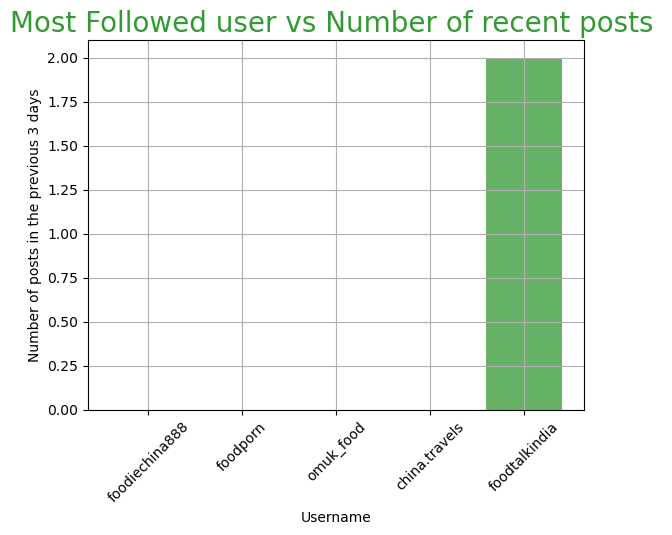

In [79]:
#plotting the graph for the above information

x = top_5_handles_names
y = number_of_posts
plt.bar(x,y,color='g',alpha=0.6)
plt.xticks(rotation=45, size=10)
plt.ylabel("Number of posts in the previous 3 days",size=10)
plt.xlabel("Username",size=10)
plt.title('Most Followed user vs Number of recent posts ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

# Problem 2 : List of hashtags
Your friend also needs a list of hashtags that he should use in his posts.

1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

3.Create a csv file with two columns : the word and its frequency

4.Now, find the hashtags that were most popular among these bloggers

5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

## Part 1
1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [34]:
hashtag_names=[]
for i in top_5_handles_names:
    search(i)                                                         # searching the profiles manually
    driver.execute_script('window.scrollTo(0, 3000);')
    time.sleep(2)                                                     # waiting for it to open
    posts = driver.find_elements(By.XPATH,'//div[contains(@class,"_aabd _aa8k  _al3l")]')  # locating the posts
    for post in posts[:10]:
        post.click()
        time.sleep(2)
        hashtag = driver.find_elements(By.XPATH,'//a[contains(@class,"x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz  _aa9_ _a6hd")]')
        for i in hashtag:
            hashtag_names.append(i.text)
        time.sleep(2)
        driver.find_element(By.CSS_SELECTOR,'[aria-label=Close]').click() # when came out of loop then close the post and hit back to home
    driver.back()

In [35]:
for i in hashtag_names:                                            # prepared a list of all words used in the posts
    print(i)

#recipe
#cooking
#abalone
#seafood
#garlic
#shellfish
#recipe
#cooking
#chinesefood
#jelly
#noodles
#summerrecipes
#recipe
#cooking
#chinesefood
#rice
#ricerecipes
#lifehacks
#recipe
#cooking
#chinesefood
#hamburger
#appetizer
#mushroom
#recipe
#cooking
#chinesefood
#claypot
#rice
#comfortfood
#cantonesefood
#recipe
#cooking
#chinesefood
#chickenrecipe
#chickenbreast
#meatlover
#veganrecipes
#vegetarian
#cooking
#chinesefood
#broccoli
#vegetables
#stirfry
#recipe
#cooking
#chinesefood
#fishcake
#fishtofu
#fishrecipes
#recipe
#cooking
#chinesefood
#pork
#rib
#spareribs
#meatlover
#recipe
#cooking
#chinesefood
#chitterlings
#intestines
#pork
#claypot
#cantonesefood
#singapore
#saintpierre
#foodporn
#food
#michelinstar
#french
#visitspain
#travelspain
#spaintrip
#foodietravel
#foodieadventures
#michelinstars
#michelinrestaurant
#FOODPORN
#ItsOnlyFood
#GetYourMindOutOfTheGutter
#review
#friedchicken
#icecream
#tiktokfood
#foodie
#instafood
#foodphotography
#foodstagram
#yummy
#instagood
#l

## Part 2
Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [36]:
words_frequency = {}
for i in hashtag_names:
    words_frequency[i] = words_frequency.get(i,0)+1

words_list = []
for i in sorted(words_frequency, key=words_frequency.get, reverse=True):
    words_list.append([i,words_frequency[i]])
    print(i,words_frequency[i])


#cooking 11
#food 11
#yummy 11
#delicious 11
#foodtalkindia 10
#discover 10
#recipe 9
#chinesefood 9
#flavours 7
#일반 6
#먹스타그램 5
#delhincr 5
#외부 3
#오먹포 3
#오먹하 3
#visitchina 3
#shanghai 3
#rice 2
#claypot 2
#cantonesefood 2
#meatlover 2
#pork 2
#foodporn 2
#foodie 2
#healthy 2
#breakfast 2
#간식 2
#kfood 2
#오먹완 2
#강남맛집 2
#냠냠 2
#신상 2
#누데이크신사점 2
#chinatravel 2
#chinatrip 2
#instachina 2
#discoverchina 2
#hongkong 2
#hk 2
#hkig 2
#hktravel 2
#china 2
#chocolate 2
#pizza 2
#pizzeria 2
#EpicEpicure 2
#newintown 2
#abalone 1
#seafood 1
#garlic 1
#shellfish 1
#jelly 1
#noodles 1
#summerrecipes 1
#ricerecipes 1
#lifehacks 1
#hamburger 1
#appetizer 1
#mushroom 1
#comfortfood 1
#chickenrecipe 1
#chickenbreast 1
#veganrecipes 1
#vegetarian 1
#broccoli 1
#vegetables 1
#stirfry 1
#fishcake 1
#fishtofu 1
#fishrecipes 1
#rib 1
#spareribs 1
#chitterlings 1
#intestines 1
#singapore 1
#saintpierre 1
#michelinstar 1
#french 1
#visitspain 1
#travelspain 1
#spaintrip 1
#foodietravel 1
#foodieadventures 1
#mich

## Part 3
Create a csv file with two columns : the word and its frequency

In [37]:
df = pd.DataFrame(words_list,columns=['Words','Frequency'])
df.to_csv('words_frequency.csv',index=False)
df.head(10)

,Words,Frequency
0,#cooking,11
1,#food,11
2,#yummy,11
3,#delicious,11
4,#foodtalkindia,10
5,#discover,10
6,#recipe,9
7,#chinesefood,9
8,#flavours,7
9,#일반,6


## Part 4
Now, find the hashtags that were most popular among these bloggers

In [38]:
print(words_list[0][0])

#cooking


## Part 5
Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

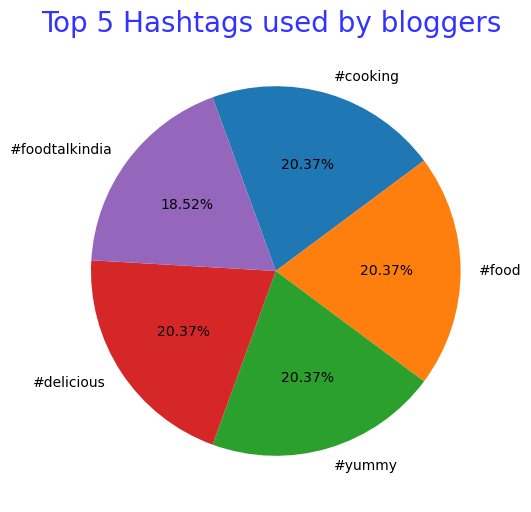

In [39]:
hashtag_name = [words_list[0][0],words_list[1][0],words_list[2][0],words_list[3][0],words_list[4][0]]
count = [words_list[0][1],words_list[1][1],words_list[2][1],words_list[3][1],words_list[4][1]]
plt.figure(figsize=(12,6))
plt.pie(count,labels=hashtag_name,autopct='%0.2f%%',radius=1,counterclock=False,startangle=110)
plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='blue',alpha=0.8)
plt.show()

# Problem 3 : Followers : Likes ratio
You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:

1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.

2.Calculate the average likes for a handle.

3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

4.Create a bar graph to depict the above obtained information.
## Part 1
Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [54]:
handles_posts_likes = {}
for i in top_5_handles_names:
    search(i)                                  # seaching and opening the profile manually
    driver.execute_script('window.scrollTo(0, 3000);')
    time.sleep(2)                                                     # waiting for it to open
    posts = driver.find_elements(By.XPATH,'//div[contains(@class,"_aabd _aa8k  _al3l")]')  # locating the posts
    likes = []
    count = 1
    for post in posts:
        post.click()                           # clicking and opening the posts       
        try:                                   # appending the posts likes to the list
            likes.append(int(driver.find_element(By.XPATH,'//span[contains(@class,"x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj")]/span').text.replace(',','')))
        except NoSuchElementException:
            driver.find_element(By.CSS_SELECTOR,'[aria-label=Close]').click()
            continue
        time.sleep(2)
        driver.find_element(By.CSS_SELECTOR,'[aria-label=Close]').click() # when came out of loop then close the post 
        if count < 10:
            count+=1
        else:
            break
    handles_posts_likes[i] = likes
    driver.back()

In [55]:
handles_posts_likes          # printing the likes of top 10 posts of the 5 handles

{'foodiechina888': [57007,
  336053,
  146039,
  6022,
  5553,
  11784,
  17302,
  14375,
  11412,
  8779],
 'foodporn': [3271, 14889, 837, 3261, 2533, 257, 1569, 5032, 3044, 538],
 'omuk_food': [19534, 11211, 6350, 342, 538, 353, 2327, 2114, 842, 2710],
 'china.travels': [781, 450, 4701, 387, 2571, 483, 677, 467, 1216, 1554],
 'foodtalkindia': [117, 110, 139, 298, 293, 333, 145, 225, 319, 401]}

## Part 2
Calculate the average likes for a handle.

In [62]:
avg_like = {}                                     # average likes dictionary
for name,like_list in handles_posts_likes.items():# traversing through the handle post and like dictionary and calculating the average likes
    avg = 0
    for i in like_list:
        avg+=i
    avg_like[name] = avg//len(like_list)
avg_like                                          # printing the average likes

{'foodiechina888': 61432,
 'foodporn': 3523,
 'omuk_food': 4632,
 'china.travels': 1328,
 'foodtalkindia': 238}

## Part 3
Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [72]:
number_of_follow_like_ratio = {}                  # number of followers and like ration dictionary
follow = []
for i in top_5_handles[:5]:
    follow.append(i[1])

avg = []       # seperating the average likes                                   
for i in avg_like.values():
    avg.append(i)

names = []     # seperating the names
for i in top_5_handles[:5]:
    names.append(i[0])

for i in range(5): # now appending both likes and names together
    number_of_follow_like_ratio[names[i]] = follow[i]//avg[i]

number_of_follow_like_ratio

{'foodiechina888': 41,
 'foodporn': 420,
 'omuk_food': 230,
 'china.travels': 261,
 'foodtalkindia': 1302}

## Part 4
Create a bar graph to depict the above obtained information.

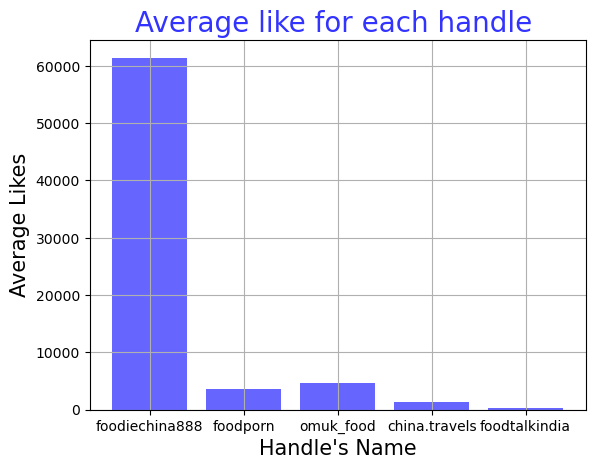

In [76]:
handle = list(avg_like.keys())
average = list(avg_like.values())
plt.bar(handle,average,color='b',alpha=0.6)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.title('Average like for each handle ',fontsize=20, color='blue',alpha=0.8)
plt.grid()
plt.show()      #plotting graph


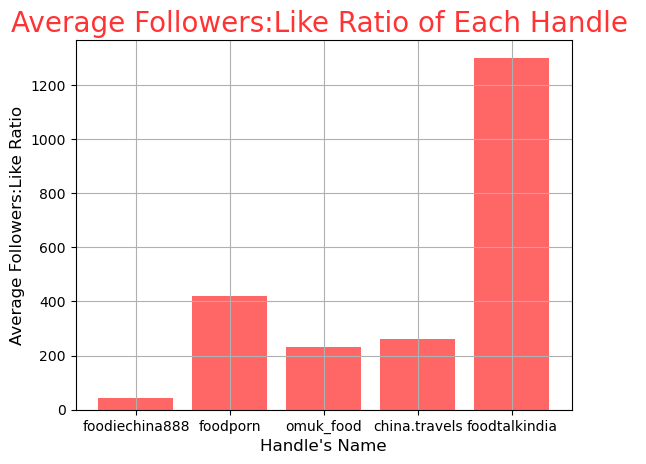

In [78]:
handles_name = list(number_of_follow_like_ratio.keys())
ratio = list(number_of_follow_like_ratio.values())

plt.bar(handles_name,ratio,color='red',alpha=0.6)
plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle's Name",size=12)
plt.title('Average Followers:Like Ratio of Each Handle ',fontsize=20, color='red',alpha=0.8)
plt.grid()
plt.show()         #plotting graph